In [202]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [203]:
path = 'C:/Users/84393/OneDrive - CÔNG TY TNHH OFFICIENCE/PYTHON/Decision_Tree/'

df = pd.read_csv(path + 'titanic.csv')
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [204]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [205]:
df= df[['Survived', 'Pclass','Sex', 'Age', 'Fare']]

In [206]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [207]:
df[~df.Age.isnull()]['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

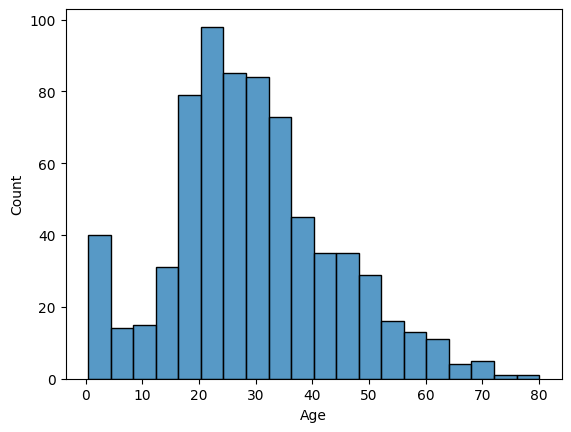

In [208]:
sns.histplot(data = df['Age'])

In [209]:
df['Age'].median()

28.0

# Age and Gender

In [210]:
age_median = df['Age'].median()
df['Age'] = df['Age'].fillna(age_median)
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,28.0,23.4500
889,1,1,male,26.0,30.0000


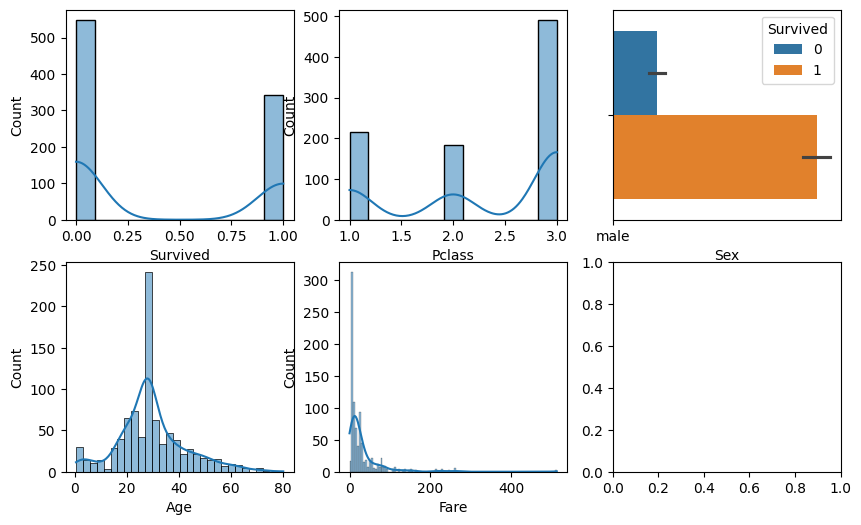

In [211]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10,6))

axes = axes.flatten()  # Flatten the 2D array to a 1D array
for ax, feature in zip(axes, df.columns):
    if df[feature].dtype != 'object':
        sns.histplot(df, x = feature, kde=True, ax=ax)
    elif df[feature].dtype == 'object':
        sns.barplot(data=df, x=feature, hue=df['Survived'], ax=ax)
    # ax.set_title(f'{feature}')
    # ax.set_xlable("value")
    # ax.set_ylabel(f'{feature}')


plt.show()


# Preprocessing

In [212]:
from sklearn.preprocessing import LabelEncoder

In [213]:
le = LabelEncoder()

df['Sex_n'] = le.fit_transform(df['Sex'])

In [214]:
df

,Survived,Pclass,Sex,Age,Fare,Sex_n
0,0,3,male,22.0,7.2500,1
1,1,1,female,38.0,71.2833,0
2,1,3,female,26.0,7.9250,0
3,1,1,female,35.0,53.1000,0
4,0,3,male,35.0,8.0500,1
...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,1
887,1,1,female,19.0,30.0000,0
888,0,3,female,28.0,23.4500,0
889,1,1,male,26.0,30.0000,1


In [215]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [216]:
# 0 is the first column in my X
ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(), [1])],   # The column numbers to be transformed (here is [0] but can be [0, 1, 3])
    remainder='passthrough'                                         # Leave the rest of the columns untouched
)

In [228]:
X = df[[ 'Age','Sex_n', 'Pclass', 'Fare']]
y = df['Survived']

In [229]:
X.head()

,Age,Sex_n,Pclass,Fare
0,22.0,1,3,7.2500
1,38.0,0,1,71.2833
2,26.0,0,3,7.9250
3,35.0,0,1,53.1000
4,35.0,1,3,8.0500


In [230]:
X_ohe = ct.fit_transform(X)
X_ohe

array([[ 0.    ,  1.    , 22.    ,  3.    ,  7.25  ],
       [ 1.    ,  0.    , 38.    ,  1.    , 71.2833],
       [ 1.    ,  0.    , 26.    ,  3.    ,  7.925 ],
       ...,
       [ 1.    ,  0.    , 28.    ,  3.    , 23.45  ],
       [ 0.    ,  1.    , 26.    ,  1.    , 30.    ],
       [ 0.    ,  1.    , 32.    ,  3.    ,  7.75  ]])

In [231]:
X_ohe.shape

(891, 5)

In [232]:
X_ohe_2 = X_ohe[:,1:]

In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Model

In [79]:
X = df[['Age', 'Pclass', 'Fare', 'Sex_n']]
y = df['Survived']

In [81]:
tree = DecisionTreeClassifier()

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(712, 4)

In [84]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [86]:
tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [87]:
y_pred = tree.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1], dtype=int64)

first train got 0.7430167597765364

In [101]:
tree.score(X_test, y_test)

0.7430167597765364

In [104]:
cm = confusion_matrix(y_test, y_pred)

<Axes: >

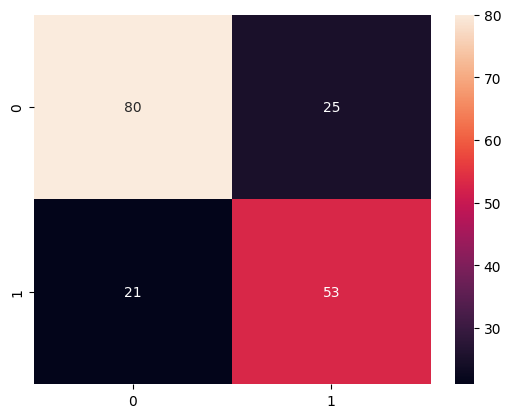

In [105]:
sns.heatmap(cm, annot=True)

# Model 2

In [171]:
y = df['Survived']

In [165]:
tree2 = DecisionTreeClassifier()

In [223]:
print(X_ohe_2.shape)
print(y.shape)

(891, 5)
(891,)


In [233]:
X_train, X_test, y_train, y_test = train_test_split(X_ohe_2, y, test_size=0.2, random_state=42)

In [234]:
tree2.fit(X_train, y_train)

DecisionTreeClassifier()

In [235]:
y_pred = tree2.predict(X_test)

In [236]:
tree2.score(X_test, y_test)

0.7541899441340782